In [5]:
import wget

In [7]:
url = 'https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt'
wget.download(url)

100% [................................................................................] 2791 / 2791

'categories (1).txt'

In [2]:
f = open("class_names2.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [3]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)

['apple', 'axe', 'airplane', 'alarm_clock', 'circle', 'face', 'potato', 'pig', 'hurricane', 'cookie', 'cake', 'baseball', 'soccer_ball', 'pickup_truck']


In [64]:
!mkdir data

하위 디렉터리 또는 파일 data이(가) 이미 있습니다.


In [65]:
!mkdir data2

하위 디렉터리 또는 파일 data2이(가) 이미 있습니다.


In [4]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [67]:
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data2/'+c+'.npy')

In [68]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/axe.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/circle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/face.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/potato.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pig.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/hurricane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cookie.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cake.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_b

In [30]:
def load_data(root, vfold_ratio=0.1, max_items_per_class=10000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        print(idx)
        print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [31]:
x_train, y_train, x_test, y_test, class_names = load_data('data2')
num_classes = len(class_names)
image_size = 28

0
data2\airplane.npy
1
data2\alarm_clock.npy
2
data2\apple.npy
3
data2\axe.npy
4
data2\baseball.npy
5
data2\cake.npy
6
data2\circle.npy
7
data2\cookie.npy
8
data2\face.npy
9
data2\hurricane.npy
10
data2\pickup_truck.npy
11
data2\pig.npy
12
data2\potato.npy
13
data2\soccer_ball.npy


In [32]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

126000
126000
14000
14000


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

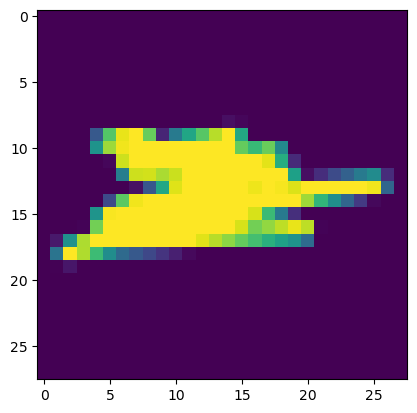

In [33]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

idx = randint(0, len(x_train))
print(x_train[idx].reshape(28,28))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [34]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [36]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))

model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(14, activation='softmax')) 
# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['top_k_categorical_accuracy'])
print(model.summary())

126000
126000
14000
14000
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                       

In [37]:
hist = model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=20)

Epoch 1/20
443/443 - 13s - loss: 0.8264 - top_k_categorical_accuracy: 0.9468 - val_loss: 0.5545 - val_top_k_categorical_accuracy: 0.9704 - 13s/epoch - 28ms/step
Epoch 2/20
443/443 - 6s - loss: 0.5125 - top_k_categorical_accuracy: 0.9736 - val_loss: 0.4634 - val_top_k_categorical_accuracy: 0.9740 - 6s/epoch - 14ms/step
Epoch 3/20
443/443 - 6s - loss: 0.4417 - top_k_categorical_accuracy: 0.9781 - val_loss: 0.4365 - val_top_k_categorical_accuracy: 0.9758 - 6s/epoch - 14ms/step
Epoch 4/20
443/443 - 6s - loss: 0.4016 - top_k_categorical_accuracy: 0.9806 - val_loss: 0.4130 - val_top_k_categorical_accuracy: 0.9773 - 6s/epoch - 14ms/step
Epoch 5/20
443/443 - 6s - loss: 0.3677 - top_k_categorical_accuracy: 0.9830 - val_loss: 0.3870 - val_top_k_categorical_accuracy: 0.9775 - 6s/epoch - 14ms/step
Epoch 6/20
443/443 - 6s - loss: 0.3407 - top_k_categorical_accuracy: 0.9848 - val_loss: 0.3763 - val_top_k_categorical_accuracy: 0.9774 - 6s/epoch - 14ms/step
Epoch 7/20
443/443 - 6s - loss: 0.3233 - top

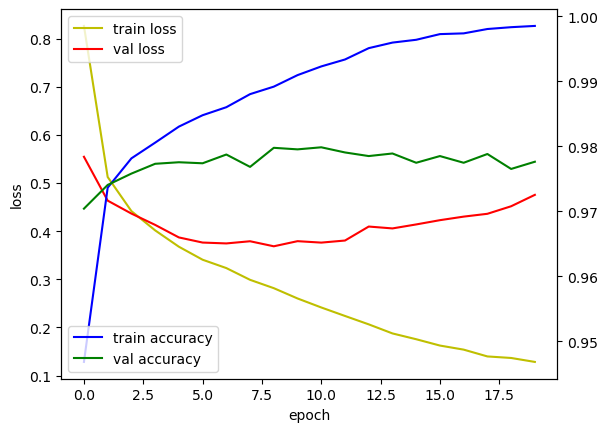

In [38]:
# 5. 모델 학습과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['top_k_categorical_accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_top_k_categorical_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [39]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

126000
126000
14000
14000
Test accuarcy: 98.14%


In [42]:
with open('class_names2.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [43]:
model.save('path/osy_model2.h5')